# Download

## Notebook link: http://tinyurl.com/eng122-oct19

# Submission

## Step 1: Rename your notebook

LAST1_NAME1_LAST2_NAME2

for example:

MOORE_JASON_HOWLETT_JAMES

## Step 2: Turn in your notebook and a PDF version to **Canvas** by midnight Saturday.

# Introduction

The center of mass of a book (modeled as a homogeneous cuboid of mass $m$, length $l$, and height $h$) lies directly above the top of a cylinder of radius $r$. There is sufficient friction to prevent slipping of the two surfaces when the book is perturbed from this equilibrium position. Let $\theta$ be the angle between the vertical and the radial line that passes through the contact point when the book oscillates in a vertical plane perpendicular to the axis of the cylinder.

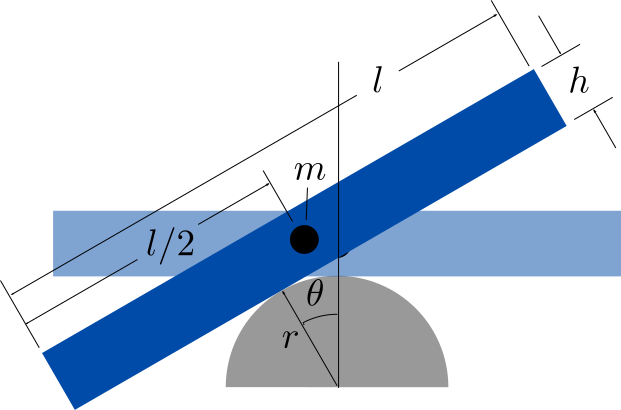

In [1]:
from IPython.display import SVG, Latex
SVG('book-balance.svg')

# Non-linear Equation of Motion

The book oscillates at an angular rate, $\dot{\theta}$, and the magnitude of the velocity of the center of mass of the book can be shown to be $v = \frac{1}{2} \sqrt{\left(h^{2} + 4 r^{2} \theta^{2}\right) \dot{\theta}^{2}}$. The moment of inertia of the book is approximately $\frac{m}{12} \left(h^{2} + l^{2}\right)$.

Thus, the total kinetic energy is:

$$T = \frac{m \dot{\theta}^{2}}{24} \left(h^{2} + l^{2}\right) + \frac{m \dot{\theta}^{2}}{8} \left(h^{2} + 4 r^{2} \theta^{2}\right)$$

The potential energy is:

$$U = - g m \left(\frac{h}{2} - r \theta \operatorname{sin}\left(\theta\right) + r - \left(\frac{h}{2} + r\right) \operatorname{cos}\left(\theta\right)\right)$$

The Langragian can be formed and then finally the equation of motion:

$$ - \frac{g h}{2} m \operatorname{sin}\left(\theta\right) + g m r \theta \operatorname{cos}\left(\theta\right) + \frac{h^{2} m}{3} \ddot{\theta} + \frac{l^{2} m}{12} \ddot{\theta} + m r^{2} \theta^{2} \ddot{\theta} + m r^{2} \theta \dot{\theta}^{2} = 0$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

In [ ]:
%matplotlib notebook

# Question

Linearize the non-linear equation of motion about $\theta=0$ and type the result below:

*Type answer here*

# Question

Derive an approximate expression for the natural frequency of small oscillations by linearizing the above equation of motion about $\theta=0$, the equilibrium point and compute the natural frequency in rad/s and Hz along with the period of osciallation. Use the parameters $m= 1.058\textrm{ kg}$, $l = 0.238 \textrm{ m}$, $g = 9.81 \textrm{ ms}^{-1}$, $h = 0.029 \textrm{ m}$, and $r=0.042 \textrm{ m}$.

*Type answer here*

In [ ]:
m = 1.058  # kg
l = 0.238  # m
g = 9.81  # m/s^2
h = 0.029  # m
r = 0.042 # m

In [ ]:
omega_n = 
Latex('$\omega_n = {:1.3f} \\textrm{{ rad/s}}$'.format(omega_n))

In [ ]:
fn = 
Latex('$f_n = {:1.3f} \\textrm{{ Hz}}$'.format(fn))

In [ ]:
Tn = 
Latex('$T_n = {:1.3f} \\textrm{{ s}}$'.format(Tn))

# Question

Describe how the mass affects the natural frequency of the system.

*Type answer here*

# Question

Are there any limits to the size of the book (the ratios $h/r$ or $l/r$) by a requirement of  stability of the oscillations? Said another way, how high a pile of books can you balance? Hint; it is probably difficult to balance a very high pile of book. Recall that if the effective stiffness is negative you will get unstable behavior in an $m$-$k$ model.

*Type answer here*

# Question

Simulate the linear and non-linear equations of motion that predict the free response of the book released from rest at an initial angle $\theta_0=1\textrm{ deg}$ for 10 seconds. Use `scipy.integrate.odeint` for the numerical integration. Plot the results of each simulation on the same graph.

In [ ]:
from scipy.integrate import odeint

In [ ]:
def eval_nonlin_rhs(x, t):
    """Evaluates the right hand side of the non-linear differential equations.
    
    Parameters
    ==========
    x : array_like, shape(2, )
        An array of the states: [theta, omega].
    t : float
        The value of time.
        
    Returns
    =======
    xdot : array_like, shape(2, )
        An array of the derivatives of the states: [thetadot, omegadot].
    
    """
    
    theta, omega = x
    
    # type your first order equations of motion here

    return thetadot, omegadot

In [ ]:
def eval_lin_rhs(x, t):
    """Evaluates the right hand side of the non-linear differential equations.
    
    Parameters
    ==========
    x : array_like, shape(2, )
        An array of the states: [theta, omega].
    t : float
        The value of time.
        
    Returns
    =======
    xdot : array_like, shape(2, )
        An array of the derivatives of the states: [thetadot, omegadot].
    
    """
    
    theta, omega = x
    
    # type your first order linear equations of motion here
    
    return thetadot, omegadot

Simulate the system.

In [ ]:
t = np.linspace(0, 10, num=1000)

In [ ]:
x_nonlin = odeint(eval_nonlin_rhs, [np.deg2rad(1), 0], t)
x_lin = odeint(eval_lin_rhs, [np.deg2rad(1), 0], t)

Plot the trajectory of $\theta$.

In [ ]:
fig, ax = plt.subplots(1, 1)

# type both plot commands here as `ax.plot(...)`

ax.set_xlabel('Time [s]')
ax.set_ylabel('$\\theta$ [deg]')
ax.legend(['Non-linear', 'Linear']);

# Question

Using your program, create a function that calculates the period of the non-linear model to three significant figures of the 11 oscillations when $\theta_0= 1, 10 \textrm{ and } 20 \textrm{ deg}$. Compare these results to the period predicted by the linear model. By how much and why do they differ?

*Hint: Look for sign changes with `np.sign()`, use boolean indexing to extract important times, and finally `np.diff()` and `np.mean()` can be useful for finding the delta times and averaging. Note that `np.diff()` returns one fewer item in the array it operates on.*

In [ ]:
def find_period(t, theta):
    """Computes the period of oscillation based on the trajectory of theta.
    
    Parameters
    ==========
    t : array_like, shape(n,)
        An array of monotonically increasing time values.
    theta : array_like, shape(n,)
        An array of values for theta at each time in ``t``.
        
    Returns
    =======
    T : float
        An estimate of the period of oscillation.
        
    """
    
    # type your code here
       
    return T

In [ ]:
x_nonlin = odeint(eval_nonlin_rhs, [np.deg2rad(1), 0], t)
T_d = find_period(t, x_nonlin[:, 0])
T_d

In [ ]:
# repeat for 10 and 20 degrees

# Question

Using your plot above plot the linear and non-linear time repsonses for $\theta_0=20 \textrm{ deg}$. What do you observe?

In [ ]:
# Type your code here

# Question

Make a plot of the period vs $\theta_0=1,2,..,25$ for the non-linear system. Also plot a horizontal line for the linear period for comparison using `ax.axhline()`.

*Hint: Use a `for` loop to iterate through `np.arange(1, 25)` and collect your results in an initially empty list with `periods.append()`.

In [ ]:
initial_thetas = np.arange(1, 25)  # deg

periods = []

# type your for loop here

In [ ]:
fig, ax = plt.subplots(1, 1)

# type your plot commands here using `ax.plot()` and `ax.axhline()`

ax.set_xlabel(r'$\theta_0$ [rad]')
ax.set_ylabel(r'$T$ Period [s]')
ax.legend(['Non-linear', 'Linear']);

# Question

Compare the period predicted by your model to the period measured in class. If it does not match, what are the possible explanations? Is the linear model a good model to use for predicting motion of the system?

*Type your answer here.*

# Question

Derive the expression for the magnitude of the velocity of the center of mass of the book and the height value used in the potential energy expression.

*Type answer here*